In [ ]:
!pip install pandas==1.4.2 plotly==5.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.interpolation import shift

In [ ]:
%matplotlib inline

Чтение файлов Excel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('drive/MyDrive/emiss_average_salary_by_branches_by_decils.xls')
data.head()

,"Средняя заработная плата по 10-ти процентным группам работников с 2017 г. (рубль, апрель, Республика Саха (Якутия))",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,NaN,Всего
2,2017.0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",7974.5,11059.9,13650.2,16252.3,18927.5,21921.5,25316.2,29848.8,37095.1,73371.6,NaN,25541.76
3,2017.0,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,17793,27503.8,34496.2,41272,48633.7,56974,67075.4,80475.3,98184.7,197326.3,NaN,66973.45
4,2017.0,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,12207.8,18113.7,22323.9,26180.1,30129.6,34517,39833.2,47197.1,59308.4,121194.5,NaN,41100.54


In [ ]:
data.drop(labels='Unnamed: 12', axis=1, inplace=True)
data.head(2)

,"Средняя заработная плата по 10-ти процентным группам работников с 2017 г. (рубль, апрель, Республика Саха (Якутия))",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего


Для удобства вынесем все заголовки в заголовки и удалим ячейки, не содержащие данных

In [ ]:
# преобразуем части строк датафрейма в списки, чтобы их можно было объединить (concatenate) через + 
data.columns = ["Год", "Отрасль"] + data.iloc[1][2:-1].tolist() + [data.iloc[1, -1]]
data.head()

,Год,Отрасль,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
2,2017.0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",7974.5,11059.9,13650.2,16252.3,18927.5,21921.5,25316.2,29848.8,37095.1,73371.6,25541.76
3,2017.0,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,17793,27503.8,34496.2,41272,48633.7,56974,67075.4,80475.3,98184.7,197326.3,66973.45
4,2017.0,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,12207.8,18113.7,22323.9,26180.1,30129.6,34517,39833.2,47197.1,59308.4,121194.5,41100.54


In [ ]:
data = data.iloc[2:]
data.head()

,Год,Отрасль,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
2,2017.0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",7974.5,11059.9,13650.2,16252.3,18927.5,21921.5,25316.2,29848.8,37095.1,73371.6,25541.76
3,2017.0,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,17793,27503.8,34496.2,41272,48633.7,56974,67075.4,80475.3,98184.7,197326.3,66973.45
4,2017.0,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,12207.8,18113.7,22323.9,26180.1,30129.6,34517,39833.2,47197.1,59308.4,121194.5,41100.54
5,2017.0,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",12357.6,18090.3,22300.6,26228.6,30336.2,35069.3,41025.6,49486.5,63116.2,117572.7,41558.35
6,2017.0,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",9241.6,13089.4,16176.9,19022.5,21962.9,25259.4,29448.8,35285.1,44786.4,77955.3,29222.84


In [ ]:
data.reset_index(drop=True, inplace=True)
data.head()

,Год,Отрасль,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
0,2017.0,"СЕЛЬСКОЕ, ЛЕСНОЕ ХОЗЯЙСТВО, ОХОТА, РЫБОЛОВСТВО...",7974.5,11059.9,13650.2,16252.3,18927.5,21921.5,25316.2,29848.8,37095.1,73371.6,25541.76
1,2017.0,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,17793,27503.8,34496.2,41272,48633.7,56974,67075.4,80475.3,98184.7,197326.3,66973.45
2,2017.0,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,12207.8,18113.7,22323.9,26180.1,30129.6,34517,39833.2,47197.1,59308.4,121194.5,41100.54
3,2017.0,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",12357.6,18090.3,22300.6,26228.6,30336.2,35069.3,41025.6,49486.5,63116.2,117572.7,41558.35
4,2017.0,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",9241.6,13089.4,16176.9,19022.5,21962.9,25259.4,29448.8,35285.1,44786.4,77955.3,29222.84


In [ ]:
data.tail()

,Год,Отрасль,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
54,2021.0,ОБРАЗОВАНИЕ,11821.3,15571,19293.5,23075.1,27356,32043.8,37690.4,45824.2,59644.2,113239.8,38555.93
55,2021.0,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,13541.2,19117.1,23266.8,27128.2,31279.9,36196.2,43239,53844.9,71084.1,133054.4,45175.2
56,2021.0,"ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАН...",11448.6,16301.3,20653.8,24440.6,28278.5,32709.6,38337.5,46667.9,61183.9,198450,47847.15
57,2021.0,ПРЕДОСТАВЛЕНИЕ ПРОЧИХ ВИДОВ УСЛУГ,9390.1,14806.1,19682.7,25448.1,31851.4,39341.9,48617.6,61727.6,86204,269294.8,60636.43
58,2021.0,Всего по обследуемым видам экономической деяте...,14015.5,20805.6,26197,31462.4,37064.3,43724,52149,63931.2,84116.5,189337.6,56280.31


In [ ]:
data_2017 = data[data['Год']==2017]
data_2017.tail()
# ! в данных нет 2018 и 2020 года. Есть 2017, 2019, 2021

,Год,Отрасль,Первая,Вторая,Третья,Четвертая,Пятая,Шестая,Седьмая,Восьмая,Девятая,Десятая,Всего
15,2017.0,ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ ЗДРАВООХРАНЕНИЯ И СОЦИА...,8779,12229.3,14919.7,17510.5,20354.5,23799.1,28432.6,35033.6,46072.1,82537.4,28966.79
16,2017.0,"ДЕЯТЕЛЬНОСТЬ В ОБЛАСТИ КУЛЬТУРЫ, СПОРТА, ОРГАН...",7164.2,9895.6,12289.2,14700.3,17361.2,20575.4,24624,30702.7,41411.3,131474.2,31019.81
17,2017.0,ПРЕДОСТАВЛЕНИЕ ПРОЧИХ ВИДОВ УСЛУГ,6684.7,9507.1,12468.9,16002.6,19876.9,24706.6,31080.7,39419.8,54076.4,151848,36567.16
18,2017.0,Всего по обследуемым видам экономической деяте...,9015.7,13724.9,17757.2,21724.7,25983.8,30963.3,37123.9,45767,59931.3,127005.5,38899.73
19,2017.0,ГОСУДАРСТВЕННОЕ УПРАВЛЕНИЕ И ОБЕСПЕЧЕНИЕ ВОЕНН...,10927.8,16910,21371.2,26059.9,31423.3,37628.8,44667.1,52583.4,64652.3,115638.6,42186.25


Brown formula и три питоновских способа нарисовать график

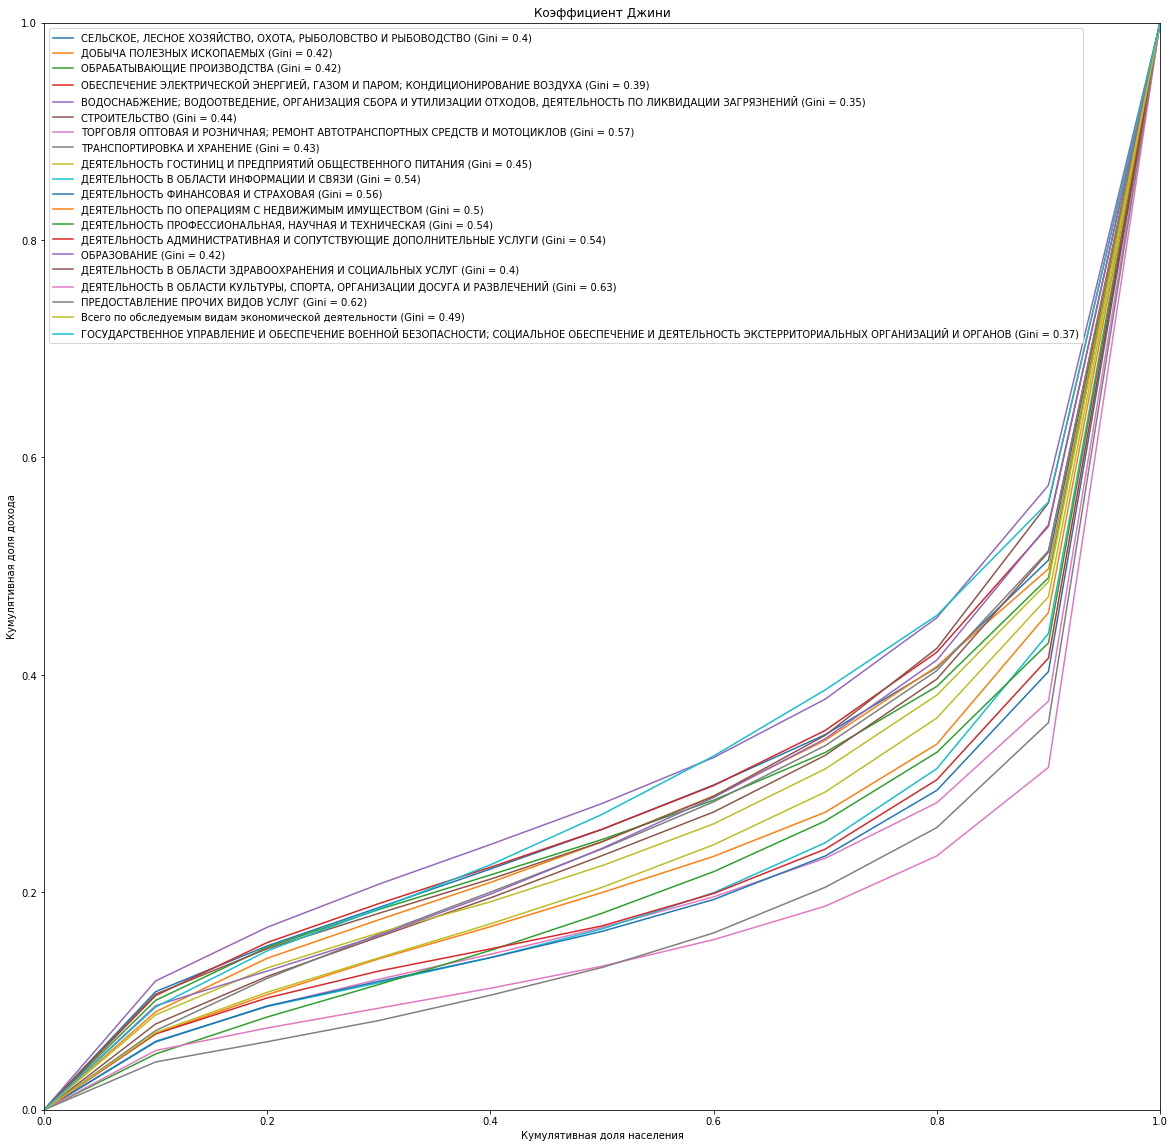

In [ ]:
Gini=[]
plt.figure(figsize = (20,20))

for branch in data_2017.iterrows():
    
    cum_income=[]
    X_k = np.arange(0.1, 1.1, 0.1)
    X_k_1 = shift(X_k, 1, cval=0)
    income_k = branch[1][2:-1].to_list()
    for i, k in enumerate(income_k):
        cum_income.append(income_k[i]/branch[1][-2])
    cum_income_k_1 = shift(cum_income, 1, cval=0)
    Gini.append(1 - np.sum((X_k - X_k_1) * (cum_income + cum_income_k_1)))
    plt.plot(np.insert(X_k,0,0), np.insert(cum_income,0,0),
             label=f'{branch[1][1]} (Gini = {round(Gini[-1], 2)})')
plt.title('Коэффициент Джини')
plt.xlabel('Кумулятивная доля населения')
plt.ylabel('Кумулятивная доля дохода')
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


In [ ]:
import plotly.express as px

In [ ]:
data_2019 = data[data['Год'] == 2019]
Gini=[]
for branch in data_2019.iterrows():
    cum_income=[]
    X_k = np.arange(0.1, 1.1, 0.1)
    X_k_1 = shift(X_k, 1, cval=0)
    income_k = branch[1][2:-1].to_list()
    for i, k in enumerate(income_k):
        cum_income.append(income_k[i]/branch[1][-2])
    cum_income_k_1 = shift(cum_income, 1, cval=0)
    Gini.append(1 - np.sum((X_k - X_k_1) * (cum_income + cum_income_k_1)))
    line = pd.DataFrame(
        {
            "Кумулятивная доля населения": np.insert(X_k,0,0),
            "Кумулятивная доля дохода": np.insert(cum_income,0,0),
        },
    )     
    fig = px.line(line, x='Кумулятивная доля населения', y='Кумулятивная доля дохода', title=branch[1][1])
    fig.show()



In [ ]:
import plotly.graph_objects as go

In [ ]:
data_2021 = data[data['Год'] == 2021]
data_2021.reset_index(drop=True, inplace=True)
Gini=[]
fig = go.Figure()
# https://htmlcolorcodes.com/color-names/
# лучше выбирать более темные. не все сейчас читаются хорошо
colors = ['firebrick', 'HotPink', 'RebeccaPurple', 'DarkRed', 'Magenta', 'Lime', 'Blue', 'Teal', 'OliveDrab',
          '#BDEDFF', # robin egg :)
          'Tan', 'SpringGreen', 'MediumSlateBlue', 'Purple', 'DarkSlateBlue', 'Tomato', 'DodgerBlue',
          'PaleVioletRed', 'IndianRed',
         ]
for branch in data_2021.iterrows():
    cum_income=[]
    X_k = np.arange(0.1, 1.1, 0.1)
    X_k_1 = shift(X_k, 1, cval=0)
    income_k = branch[1][2:-1].to_list()
    for i, k in enumerate(income_k):
        cum_income.append(income_k[i]/branch[1][-2])
    cum_income_k_1 = shift(cum_income, 1, cval=0)
    Gini.append(1 - np.sum((X_k - X_k_1) * (cum_income + cum_income_k_1)))
    name=f"{branch[1][1]}, {Gini[-1]}"
    fig.add_trace(go.Scatter(x=X_k, y=cum_income, name=name, showlegend=False, 
                             hoverlabel={"namelength": len(name)},
                         line=dict(color=colors[branch[0]], width=4)))
fig.update_layout(title='Gini coefficient',
                   xaxis_title='Кумулятивная доля населения',
                   yaxis_title='Кумулятивная доля дохода')
fig.show()